In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

df = pd.read_csv('data/diamonds.csv')

# df = pd.read_csv(r'C:\Users\Aryan\Desktop\Data Science\dataset\diamonds.csv')

In [2]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [4]:
df.drop(columns = 'Unnamed: 0', axis = 1, inplace = True)

In [5]:
print(df.isna().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [6]:
len(df.loc[(df.x==0) | (df.y==0) | (df.z==0)])

20

In [7]:
df = df[(df[['x','y','z']]!=0).all(axis=1)]

In [8]:
numerical = df[['carat', 'table', 'depth', 'x', 'y', 'z', 'price']]
categorial = df[['cut', 'clarity', 'color']]

<Axes: >

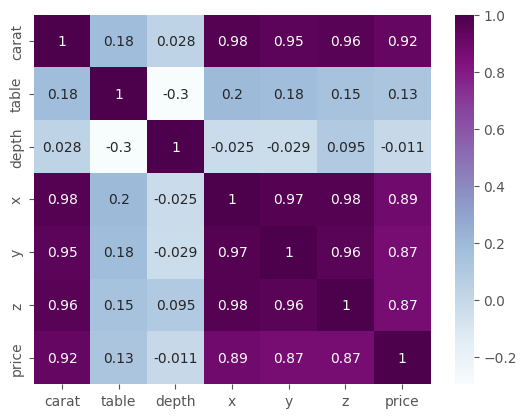

In [9]:
sns.heatmap(numerical.corr(), annot = True,cmap = "BuPu")

In [10]:
X = df.drop(['price'], axis = 1)
Y = df['price']
xyz = df[['x', 'y', 'z']]

<Axes: >

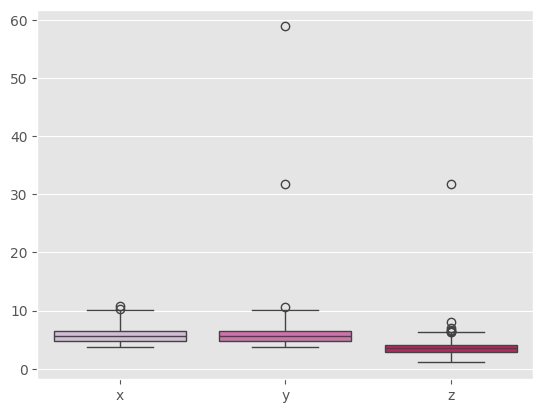

In [11]:
sns.boxplot(data = xyz, whis = 2, palette = "PuRd")

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: ylabel='carat'>

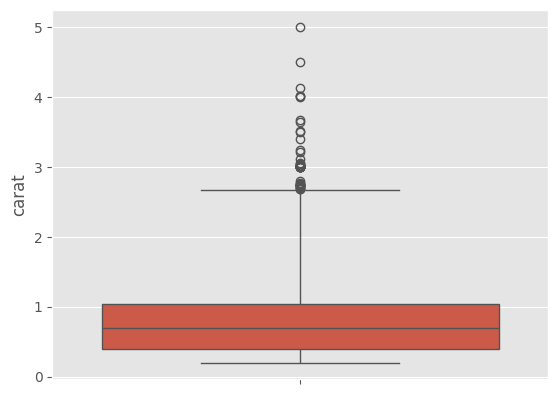

In [13]:
sns.boxplot(data = df['carat'], whis = (0, 99.9))

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'depth'}>,
        <Axes: title={'center': 'table'}>],
       [<Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >, <Axes: >]], dtype=object)

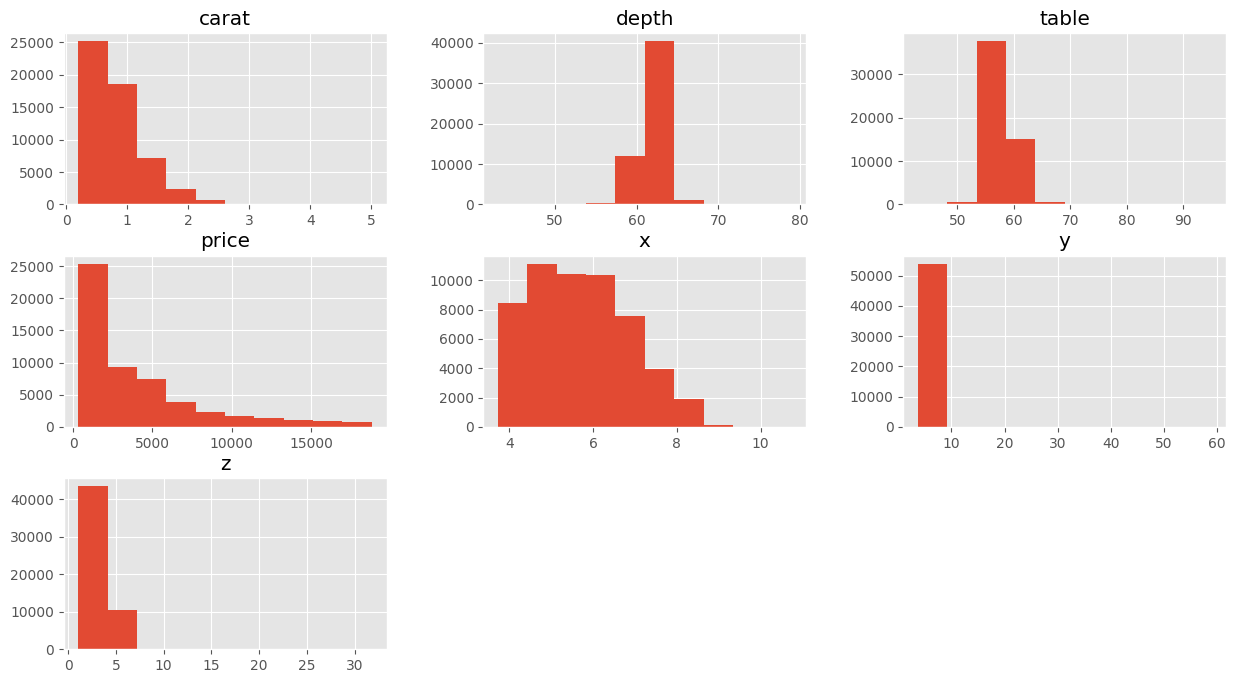

In [14]:
df.hist(figsize = (15,8))

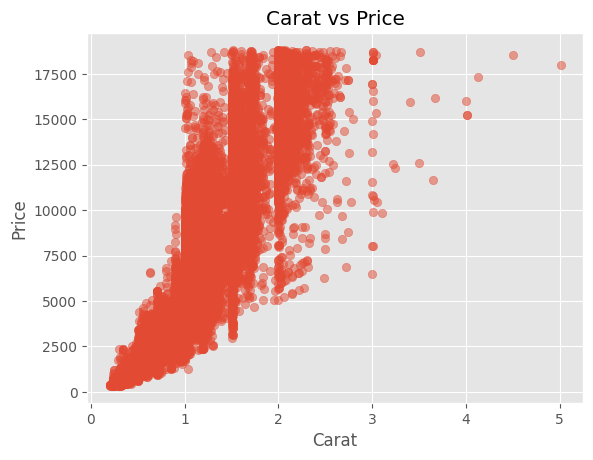

In [15]:
plt.scatter(df['carat'], df['price'], alpha=0.5)
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.show()

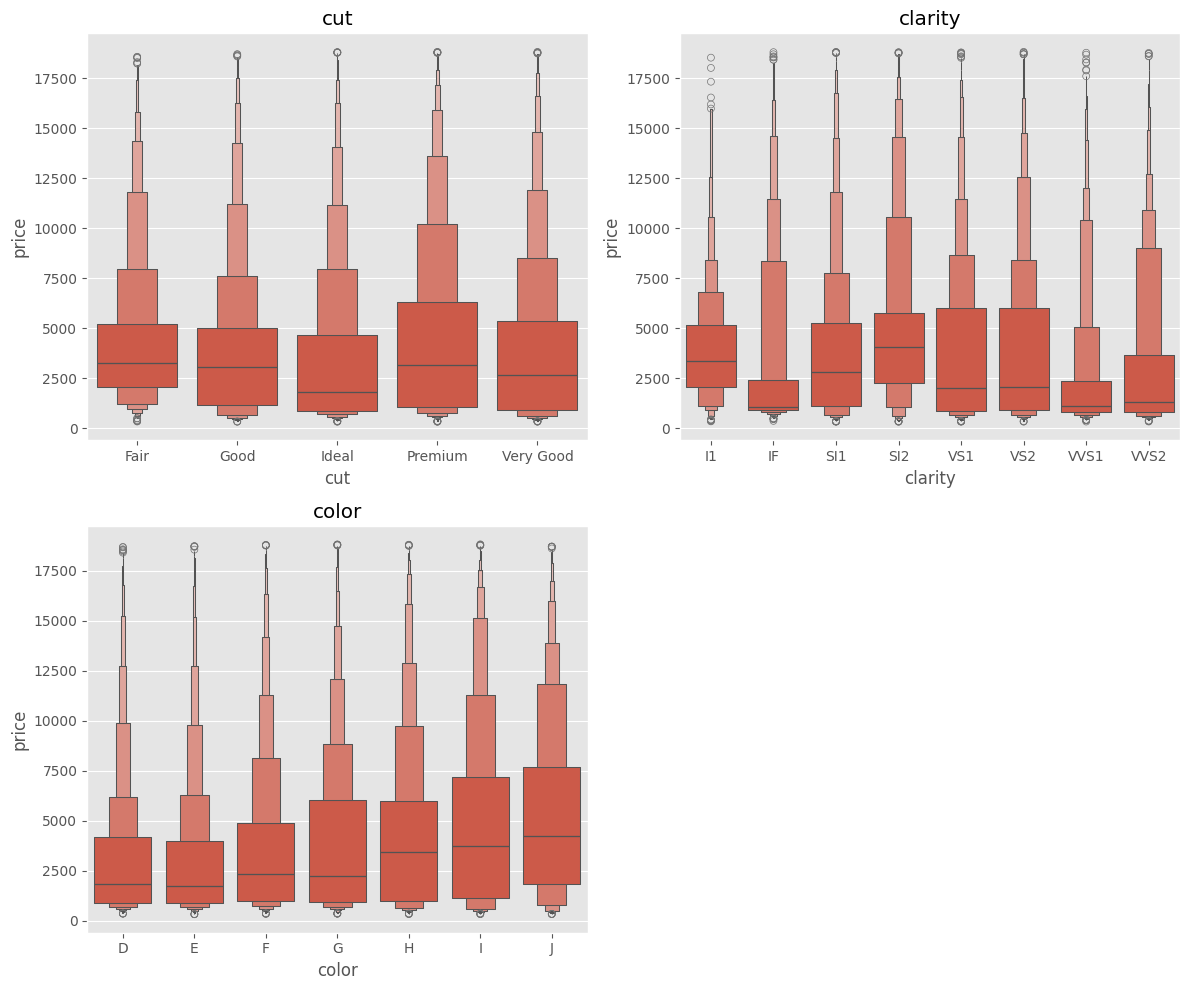

In [16]:
category = ['cut', 'clarity', 'color']
plt.figure(figsize=(12,10))
plotnumber=1
for i in category:
    ax=plt.subplot(2,2,plotnumber)
    sns.boxenplot(x=i, y='price', data=df.sort_values(i))
    plt.title(f"{i}")
    plotnumber+=1
plt.tight_layout()

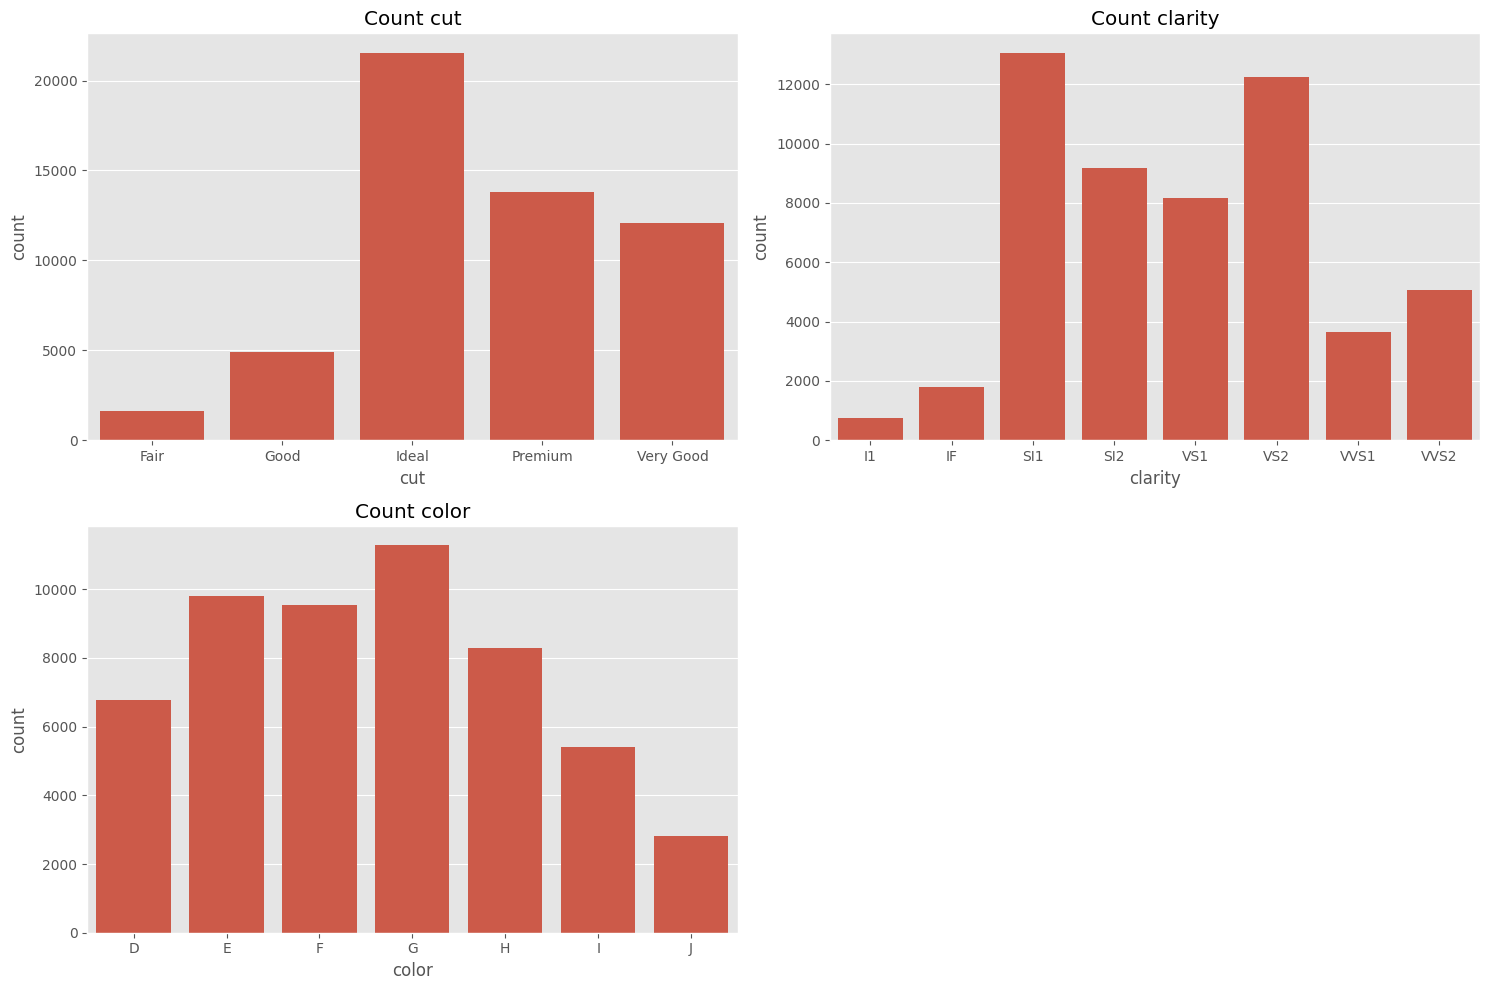

In [17]:
category = ['cut', 'clarity', 'color']
plt.figure(figsize=(15,10))
plotnumber=1
for i in category:
    ax=plt.subplot(2,2,plotnumber)
    sns.countplot(x=i, data=df.sort_values(i))
    plt.title(f"Count {i}")
    plotnumber+=1
plt.tight_layout()


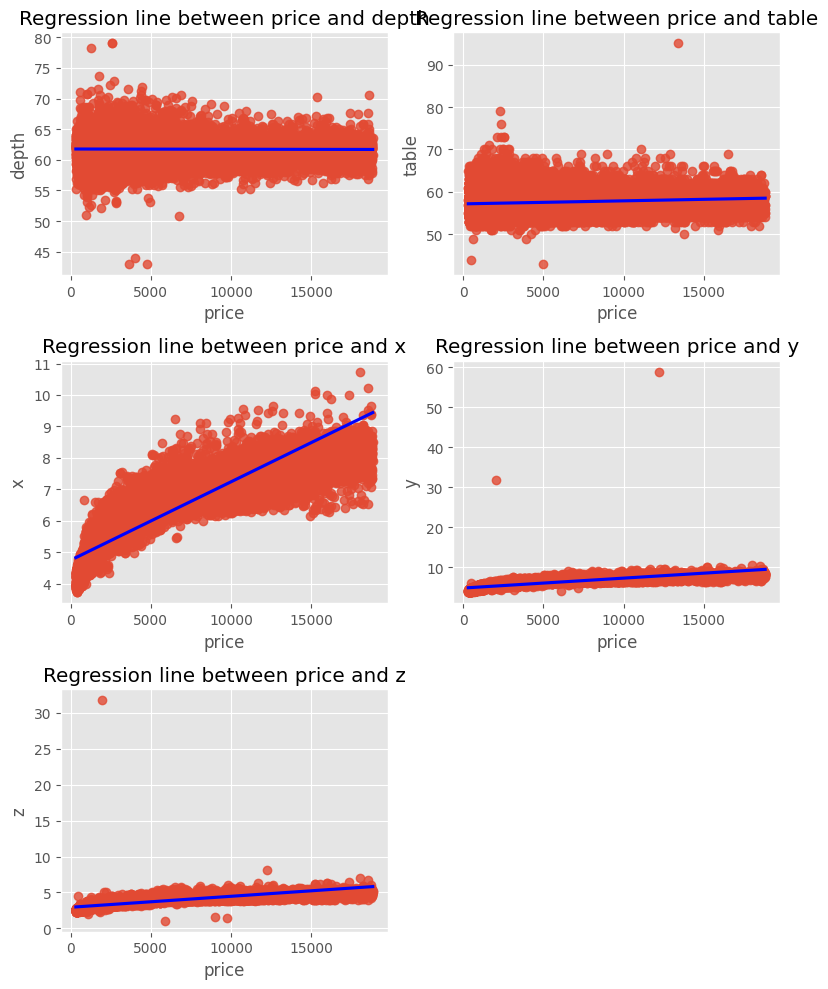

In [18]:
col = ['depth','table','x','y','z']
plt.figure(figsize=(8,10))
plotnumber=1
for i in col:
    ax=plt.subplot(3,2,plotnumber)
    sns.regplot(x='price', y=i, data=df, line_kws={'color':'blue'})
    plt.title(f"Regression line between price and {i}")
    plotnumber+=1 
plt.tight_layout()


<Axes: xlabel='z'>

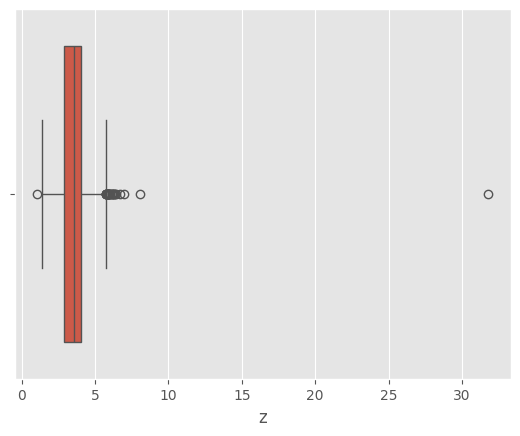

In [19]:
sns.boxplot(data=df, x = 'z')

In [20]:
df = df[(df["depth"]<75)&(df["depth"]>53)]
df = df[(df["table"]<72)&(df["table"]>45)]
df = df[(df["x"]<9.5)]
df = df[(df["y"]<15)]
df = df[(df["z"]<10)&(df["z"]>2)]
df.shape

(53883, 10)

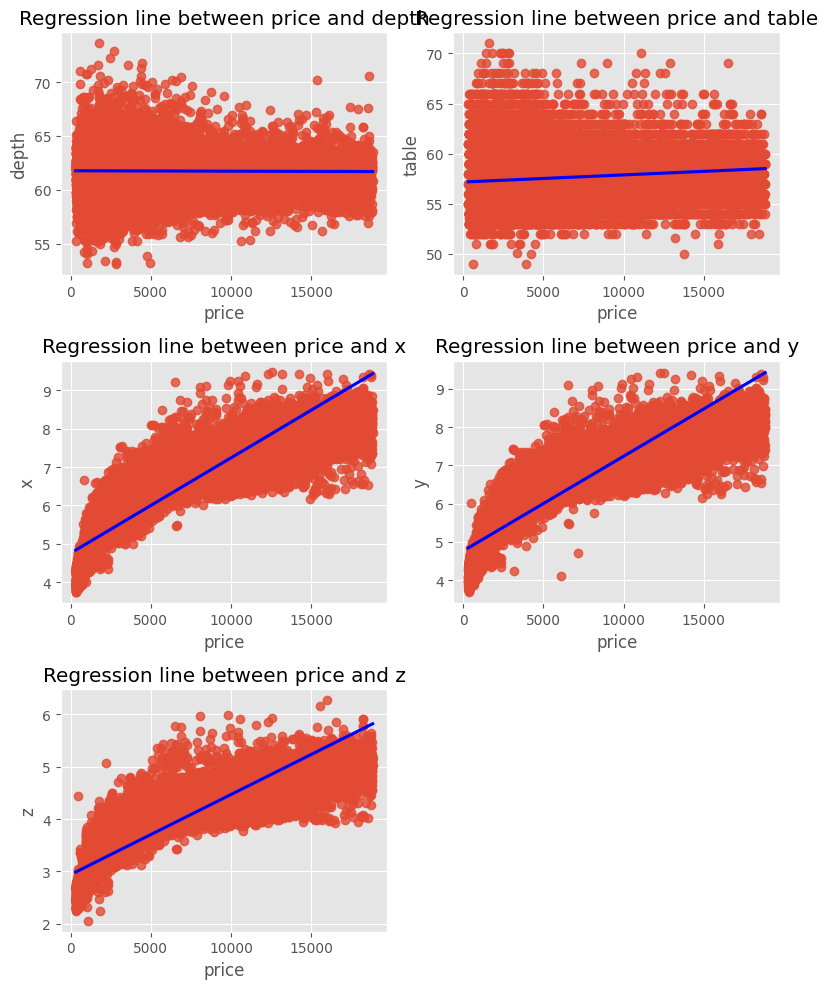

In [21]:
col = ['depth','table','x','y','z']
plt.figure(figsize=(8,10))
plotnumber=1
for i in col:
    ax=plt.subplot(3,2,plotnumber)
    sns.regplot(x='price', y=i, data=df, line_kws={'color':'blue'})
    plt.title(f"Regression line between price and {i}")
    plotnumber+=1 
plt.tight_layout()

In [22]:
from sklearn.preprocessing import LabelEncoder
enc_df = df.copy()
le = LabelEncoder()
for col in category:
    enc_df[col] = le.fit_transform(enc_df[col])


In [23]:
enc_df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
3232,0.74,3,0,5,59.3,60.0,3353,5.89,5.91,3.50
53145,0.75,3,3,2,59.1,59.0,2622,5.98,5.90,3.51
49137,0.56,2,0,5,62.2,56.0,2066,5.28,5.24,3.27
12915,1.20,2,5,2,63.5,61.0,5376,6.75,6.71,4.27
6086,1.02,0,4,2,64.6,55.0,3972,6.33,6.28,4.07


In [24]:
# plt.figure(figsize=(8,6))
# sns.heatmap(enc_df.corr(), annot=True)
enc_df.corr()['price']

carat      0.922613
cut        0.040376
color      0.171563
clarity   -0.070487
depth     -0.011114
table      0.127674
price      1.000000
x          0.887057
y          0.888641
z          0.882464
Name: price, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
X = enc_df.drop('price',axis=1)
y = enc_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=13)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import(
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
import warnings
# warnings.filterwarnings("ignore")

In [27]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR:', mean_squared_error(y_test, y_pred)**0.5)
print('MEAN ABSOLUTE ERROR:', mean_absolute_error(y_test, y_pred))

R2: 0.8878893184331421
ROOT MEAN SQUARED ERROR: 1331.377716172657
MEAN ABSOLUTE ERROR: 850.8298080573506


In [28]:
dtree = DecisionTreeRegressor(random_state=12)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR:', mean_squared_error(y_test, y_pred)**0.5)
print('MEAN ABSOLUTE ERROR:', mean_absolute_error(y_test, y_pred))

R2: 0.9648256120492917
ROOT MEAN SQUARED ERROR: 745.7462220837651
MEAN ABSOLUTE ERROR: 365.37766312820133


In [29]:
forest = RandomForestRegressor(random_state=42)
forest.fit(X_train, y_train)
y_pred=forest.predict(X_test)
print('R2:', r2_score(y_test, y_pred))
print('ROOT MEAN SQUARED ERROR:', mean_squared_error(y_test, y_pred)**0.5)
print('MEAN ABSOLUTE ERROR:', mean_absolute_error(y_test, y_pred))

R2: 0.9816641537557547
ROOT MEAN SQUARED ERROR: 538.4287810914983
MEAN ABSOLUTE ERROR: 269.2348905099491


In [30]:
avg_cut = pd.pivot_table(df, values = 'price', index = 'cut', aggfunc = np.average)
avg_clarity= pd.pivot_table(df, values = 'price', index = 'clarity', aggfunc = np.average)
avg_color=pd.pivot_table(df, values = 'price', index = 'color', aggfunc = np.average)
# df['carat_bin'] = pd.qcut(df['carat'], q=5)
df['carat_bin'] = pd.cut(
    df['carat'],
    bins=[0, 0.5, 1, 1.5, 2, 3, 4, 5],
    labels=['0–0.5', '0.5–1', '1–1.5', '1.5–2', '2–3', '3–4', '4-5']
)
avg_carat=pd.pivot_table(df, values = 'price', index = 'carat_bin', aggfunc = np.average)
print(avg_cut)
print(avg_clarity)
print(avg_color)
print(avg_carat)

                 price
cut                   
Fair       4334.651134
Good       3926.403509
Ideal      3455.786639
Premium    4574.701902
Very Good  3981.127339
               price
clarity             
I1       3775.445667
IF       2865.788709
SI1      3993.265855
SI2      5058.491941
VS1      3838.994732
VS2      3922.142566
VVS1     2519.512315
VVS2     3284.198815
             price
color             
D      3168.412581
E      3077.738509
F      3724.255507
G      3997.050527
H      4475.893607
I      5080.960466
J      5306.468070
                  price
carat_bin              
0–0.5        839.530882
0.5–1       2811.502058
1–1.5       6514.982564
1.5–2      11321.770423
2–3        14941.311892
3–4        14949.950000


C:\Users\Aryan\AppData\Local\Temp\ipykernel_17896\3230926449.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avg_carat=pd.pivot_table(df, values = 'price', index = 'carat_bin', aggfunc = np.average)
C:\Users\Aryan\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\Aryan\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


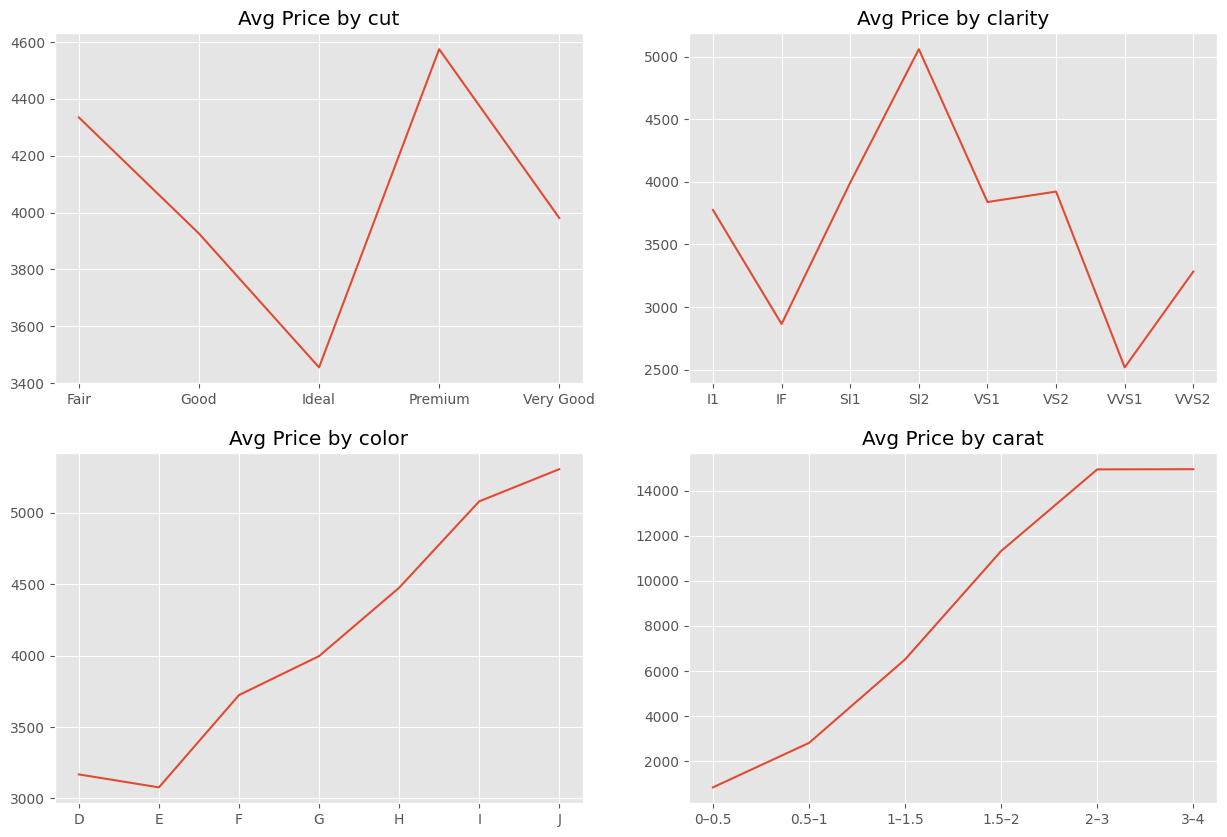

In [31]:
avgg=[avg_cut, avg_clarity, avg_color, avg_carat]
plotno=1
plt.figure(figsize=(15, 10))
name=['cut', 'clarity', 'color', 'carat']
for i,n in zip(avgg, name):
    ax= plt.subplot(2,2, plotno)
    plt.plot(i)
    plt.title(f'Avg Price by {n}')
    plotno+=1
plt.show()


In [32]:
df['ppc'] = df['price']/df['carat'] 
print(df['ppc'].median()) #average price per diamond
print(df['ppc'].mean())


3494.4444444444443
4007.80699127799


In [33]:
avgppc_cut=pd.pivot_table(df, values = 'ppc', index = 'cut', aggfunc = np.average)
avgppc_clarity=pd.pivot_table(df, values = 'ppc', index = 'clarity', aggfunc = np.average)
avgppc_color=pd.pivot_table(df, values = 'ppc', index = 'color', aggfunc = np.average)
avgppc_carat=pd.pivot_table(df, values = 'ppc', index = 'carat_bin', aggfunc = np.average)
#average price per carat per carat bin
print(avgppc_cut)
print(avgppc_clarity)
print(avgppc_color)

                   ppc
cut                   
Fair       3768.354727
Good       3859.941207
Ideal      3919.067002
Premium    4221.170033
Very Good  4014.246290
                 ppc
clarity             
I1       2784.228257
IF       4260.551401
SI1      3848.294763
SI2      4009.942245
VS1      4155.652407
VS2      4079.545852
VVS1     3848.887225
VVS2     4204.374140
               ppc
color             
D      3951.492761
E      3804.854088
F      4134.780423
G      4163.234875
H      4006.129871
I      3995.042851
J      3824.902197


C:\Users\Aryan\AppData\Local\Temp\ipykernel_17896\1872241636.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  avgppc_carat=pd.pivot_table(df, values = 'ppc', index = 'carat_bin', aggfunc = np.average)
C:\Users\Aryan\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:552: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\Aryan\AppData\Roaming\Python\Python313\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


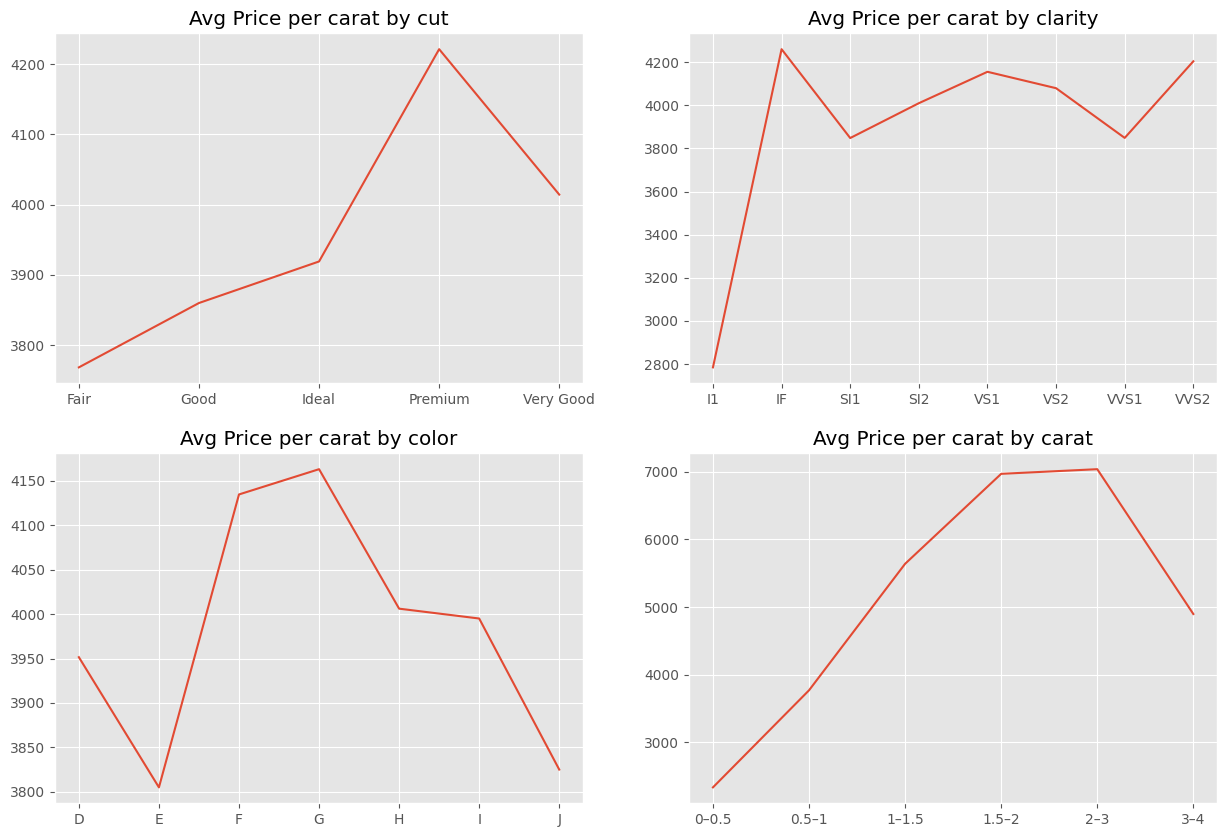

In [34]:
avgg=[avgppc_cut, avgppc_clarity, avgppc_color, avgppc_carat]
plotno=1
plt.figure(figsize=(15, 10))
name=['cut', 'clarity', 'color', 'carat']
for i,n in zip(avgg, name):
    ax= plt.subplot(2,2, plotno)
    plt.plot(i)
    plt.title(f'Avg Price per carat by {n}')
    plotno+=1
plt.show()

In [35]:
medppc_cut=pd.pivot_table(df, values = 'ppc', index = 'cut', aggfunc = np.median)
medppc_clarity=pd.pivot_table(df, values = 'ppc', index = 'clarity', aggfunc = np.median)
medppc_color=pd.pivot_table(df, values = 'ppc', index = 'color', aggfunc = np.median)
medppc_carat=pd.pivot_table(df, values = 'ppc', index = 'carat_bin', aggfunc = np.median)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_17896\2073942469.py:1: FutureWarning: The provided callable <function median at 0x000001814B8A1E40> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  medppc_cut=pd.pivot_table(df, values = 'ppc', index = 'cut', aggfunc = np.median)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_17896\2073942469.py:2: FutureWarning: The provided callable <function median at 0x000001814B8A1E40> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  medppc_clarity=pd.pivot_table(df, values = 'ppc', index = 'clarity', aggfunc = np.median)
C:\Users\Aryan\AppData\Local\Temp\ipykernel_17896\2073942469.py:3: FutureWarning: The provided callable <function median at 0x000001814B8A1E40> is currently using DataFrameGroupB

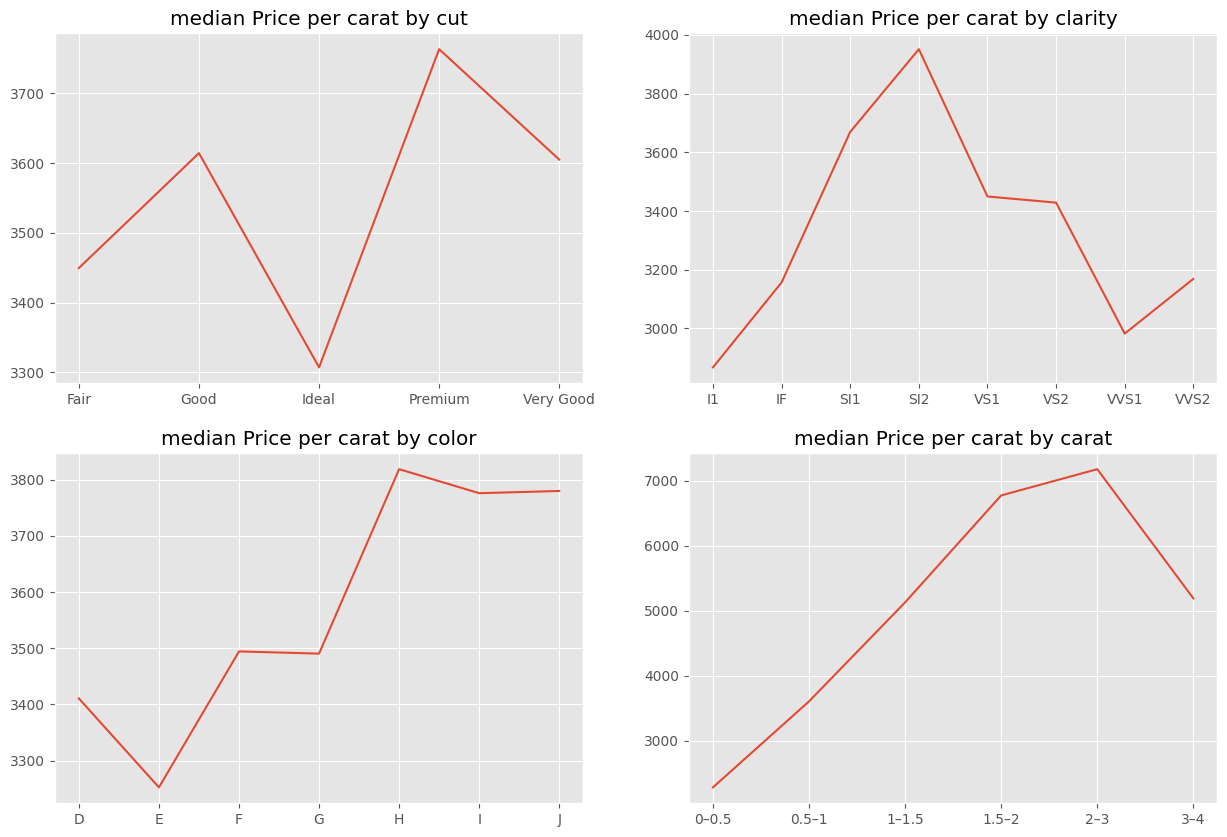

In [36]:
medd=[medppc_cut, medppc_clarity, medppc_color, medppc_carat]
plotno=1
plt.figure(figsize=(15, 10))
for i,n in zip(medd, name):
    ax= plt.subplot(2,2, plotno)
    plt.plot(i)
    plt.title(f'median Price per carat by {n}')
    plotno+=1
plt.show()

In [37]:
len(df.loc[(df.color=='J')])

2803

In [38]:
len(df.loc[(df.color=='J') & (df.price>4500)])

1317

In [39]:
df.describe()

,carat,depth,table,price,x,y,z,ppc
count,53883.000000,53883.000000,53883.000000,53883.000000,53883.000000,53883.000000,53883.000000,53883.000000
mean,0.796967,61.750474,57.454073,3928.284542,5.730528,5.732403,3.538912,4007.806991
std,0.471599,1.415272,2.217725,3983.862141,1.117800,1.109738,0.690366,2012.580575
min,0.200000,53.100000,49.000000,326.000000,3.730000,3.680000,2.060000,1051.162791
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,2476.491228
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000,3494.444444
75%,1.040000,62.500000,59.000000,5320.000000,6.540000,6.540000,4.030000,4949.019608
max,3.400000,73.600000,71.000000,18823.000000,9.490000,9.420000,6.270000,17828.846154
